<a href="https://colab.research.google.com/github/ldsbalu/Balu-Portfolio/blob/main/CS677_HW3_Bayesian_Linear_Regression_with_Conjugate_Priors_and_Known_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Analytical solution

By maximizing the he likelihood function, we can find and derive the analytical solution of MLE for linear regression coefficients

we know that noise variance is σ^2 and W is negative log-likelihood.
regression Model => $$
\begin{aligned}
\mathbf{y} &= \mathbf{X}\mathbf{w} + \epsilon \\
\epsilon &\sim N (0, \sigma^2 \mathbf{I})
\end{aligned}
$$



$\mathbf{w}^{\mathrm{MLE}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

X is design matrix of 5 degree polynomial




In [24]:
import numpy as np
import matplotlib.pyplot as plt

Loading the training Data

In [25]:
from google.colab import files
uploaded = files.upload()

In [27]:
train_data = np.loadtxt('polynomial_train.csv', delimiter=',', skiprows=1)
X_train = train_data[:, 0]
y_train = train_data[:, 1]

test_data = np.loadtxt('polynomial_test.csv', delimiter=',', skiprows=1)
X_test = test_data[:, 0]
y_test = test_data[:, 1]


In [28]:
# Creating polynomial features with degree 5
X_design_train = np.vander(X_train, N=6, increasing=True)
X_design_test = np.vander(X_test, N=6, increasing=True)

$\mathbf{w}^{\mathrm{MLE}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$


In [29]:
# Computing MLE weights with Analytical formula
w_mle = np.linalg.inv(X_design_train.T @ X_design_train) @ X_design_train.T @ y_train

In [32]:
# Generate predictions
x_grid = np.linspace(-4, 4, 200)
X_design_grid = np.vander(x_grid, N=6, increasing=True)
y_pred = X_design_grid @ w_mle

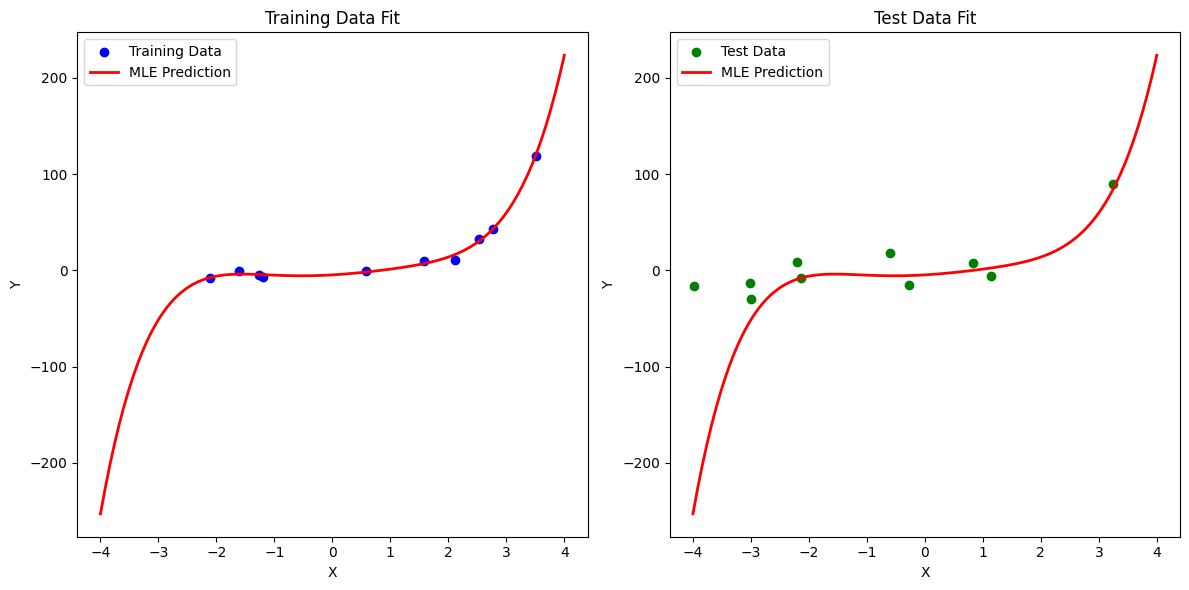

In [33]:
# Plot results
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='MLE Prediction')
plt.title('Training Data Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='MLE Prediction')
plt.title('Test Data Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()